In [1]:
%matplotlib inline

from modsim import *

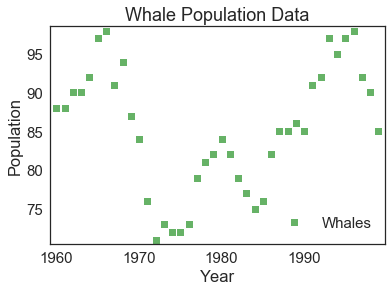

In [2]:
from pandas import read_html
whale_file = 'file:///C:/Users/aclopton/Documents/GitHub/ModSimPy/code/data/whale_population.html'

population_table = read_html(whale_file, header=0, index_col=0)

table = population_table[0]
table.columns = ['Year', 'Population']
table
newfig()
plot(table.Year, table.Population, 'gs', label = 'Whales') 
decorate(title = 'Whale Population Data', xlabel = 'Year', ylabel = 'Population')

In [3]:
#projected_birth_chance = TimeSeries of year vs individual birth chance (should be from the random library)first year is 2000, last 2050
#projected_death_chance = same for death

p0 = 80 #the initial population
t0 = 2000 #first year of the simulation
tf = 2050 #last year of the simulation


#these are just for my own testing
projected_birth_chance = TimeSeries()
projected_birth_chance[1999] = 0.1
projected_death_chance = TimeSeries()
projected_death_chance[1999] = 0.05

#get rid of this Amy, it's just so I could test the code
for i in range(t0, tf):
    projected_birth_chance[i] = 0.1
#get rid of this Amy, it's just so I could test the code
for i in range(t0, tf):
    projected_death_chance[i] = 0.1
    
def project_year (population, year):
    """
    Returns the net change in population for a given year
    
    population = the current population
    year = the current year
    """
    births = 0
    deaths = 0
    for i in range(population):
        if flip(projected_birth_chance[year]):
            births += 1
        if flip(projected_death_chance[year]):
            deaths += 1
    net_change = births - deaths 
    return net_change

def run_simulation(t0 = t0, tf = tf, p0 =p0):
    """
    Projects each year stochasically and returns the results in a TimeSeries
    
    t0 = first year
    tf = last year
    p0 = initial population
    """
    results = TimeSeries()
    results[t0] = p0
    print(results)
    for i in range(t0, tf):
        net_change = project_year(results[i], i)
        results[i+1] = results[i] + net_change
    return results

2000    80
dtype: int64
2000    80
dtype: int64
2000    80
dtype: int64


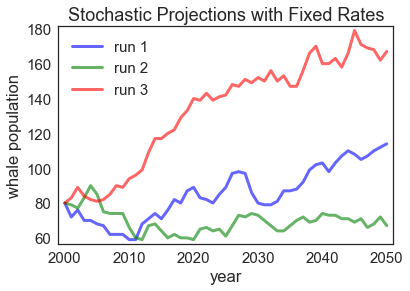

In [6]:
#Just running it a few times to make sure it's always different

population1 = run_simulation()
population2 = run_simulation()
population3 = run_simulation() 

plot(population1, 'b', label = 'run 1')
plot(population2, 'g', label = 'run 2')
plot(population3, 'r', label = 'run 3')

decorate(xlabel = 'year', ylabel = 'whale population', title = 'Stochastic Projections with Fixed Rates')


3